In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import seaborn as sns


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
driver = webdriver.Chrome()
# Setting the driver to only get the batter stats
driver.get("https://www.mlb.com/stats/")


In [3]:
""" table_hr = driver.find_elements(By.TAG_NAME, "th")
cont = 0 
df_head = []
for hr in table_hr:
    if cont <= 17:
        df_head.append(hr.text)
        cont += 1
df_head """

' table_hr = driver.find_elements(By.TAG_NAME, "th")\ncont = 0 \ndf_head = []\nfor hr in table_hr:\n    if cont <= 17:\n        df_head.append(hr.text)\n        cont += 1\ndf_head '

In [4]:
cont = 0
player_count = 0
temp_head = []
temp_stats = []

for n in range(1,6):
    print(f"Searching page: {n}")
    if n ==1:
        print("Inside the if")
        driver.get(f"https://www.mlb.com/stats/")
        sleep(random.randint(1,15+1))
        for i in driver.find_elements(By.TAG_NAME, "tr"):
            if cont <= 0:
                temp_head.append(i.text)
                cont += 1
            else:
                temp_stats.append(i.text)
        print(f"Done getting information from the page {n}")
    else:
        print("Inside the elif")
        driver.get(f"https://www.mlb.com/stats/?page={n}")
        sleep(random.randint(1, 15+1))
        for i in driver.find_elements(By.TAG_NAME, "tr"):
            if cont == 0:
                temp_head.append(i.text)
            if cont != 0:
                temp_stats.append(i.text)
                cont += 1
        print(f"Done getting information from the page {n}")
    print(f"Finished searching in page {n}")
    cont = 1


Searching page: 1
Inside the if
Done getting information from the page 1
Finished searching in page 1
Searching page: 2
Inside the elif
Done getting information from the page 2
Finished searching in page 2
Searching page: 3
Inside the elif
Done getting information from the page 3
Finished searching in page 3
Searching page: 4
Inside the elif
Done getting information from the page 4
Finished searching in page 4
Searching page: 5
Inside the elif
Done getting information from the page 5
Finished searching in page 5


In [5]:
df_head = [item for sublist in temp_head for item in sublist.split('\n')]
df_head.insert(0, "no")
df_head.insert(2, "POS")
print(df_head)


['no', 'PLAYER', 'POS', 'TEAM', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'OPS']


In [6]:
batter_stats = []
temp_lst = []

for player in temp_stats:
    temp = player.split("\n")
    # print(temp)
    cont = 0
    for i in temp:
        # print(f"Test FOR\n{i}\n---------------\n")
        if cont == 3:
            # print("Cont == 3")
            clean_stats = i.split(" ")
            for stat in clean_stats:
                temp_lst.append(stat)
                cont = 0
            batter_stats.append(temp_lst)
            temp_lst = []
        else:
            temp_lst.append(i)
            cont += 1

print(batter_stats)

[['1', 'ShoheiOhtani', 'DH', 'LAA', '119', '443', '91', '134', '20', '7', '41', '84', '75', '129', '17', '5', '.302', '.405', '.657', '1.062'], ['2', 'MattOlson', '1B', 'ATL', '119', '449', '95', '124', '21', '2', '43', '107', '80', '132', '1', '0', '.276', '.387', '.619', '1.006'], ['3', 'RonaldAcuna', 'RF', 'ATL', '119', '477', '109', '161', '29', '2', '27', '73', '65', '67', '55', '9', '.338', '.423', '.577', '1.000'], ['4', 'FreddieFreeman', '1B', 'LAD', '118', '470', '101', '158', '43', '2', '23', '83', '55', '90', '16', '1', '.336', '.414', '.583', '.997'], ['5', 'MookieBetts', 'RF', 'LAD', '112', '439', '94', '127', '32', '1', '31', '81', '69', '83', '8', '3', '.289', '.389', '.579', '.968'], ['6', 'CodyBellinger', 'CF', 'CHC', '88', '332', '68', '108', '19', '1', '18', '59', '29', '57', '17', '3', '.325', '.377', '.551', '.928'], ['7', 'YandyDiaz', '1B', 'TB', '103', '396', '71', '127', '26', '0', '16', '60', '48', '76', '0', '1', '.321', '.400', '.508', '.908'], ['7', 'JuanSot

In [7]:
"""  """

batter_stats = [sublist for sublist in batter_stats if len(sublist) != 4]
batter_stats = [[item for item in sublist if item not in ('SLG', 'OPS')] for sublist in batter_stats]


""" for x in batter_stats:
    if len(x) != 20:
        print(f"{x}") """


' for x in batter_stats:\n    if len(x) != 20:\n        print(f"{x}") '

In [8]:
batter_df = pd.DataFrame(columns=df_head, 
                         data=batter_stats)
batter_df.drop(columns=["no"], inplace=True)



In [9]:
# batter_df.to_csv("batter.csv", index=False)

In [10]:
driver.close()

In [11]:
batter_df

,PLAYER,POS,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,ShoheiOhtani,DH,LAA,119,443,91,134,20,7,41,84,75,129,17,5,.302,.405,.657,1.062
1,MattOlson,1B,ATL,119,449,95,124,21,2,43,107,80,132,1,0,.276,.387,.619,1.006
2,RonaldAcuna,RF,ATL,119,477,109,161,29,2,27,73,65,67,55,9,.338,.423,.577,1.000
3,FreddieFreeman,1B,LAD,118,470,101,158,43,2,23,83,55,90,16,1,.336,.414,.583,.997
4,MookieBetts,RF,LAD,112,439,94,127,32,1,31,81,69,83,8,3,.289,.389,.579,.968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,AndrewBenintendi,LF,CWS,112,421,56,113,26,1,2,32,40,69,12,1,.268,.334,.349,.683
121,MJMelendez,RF,KC,113,414,49,94,22,3,12,42,42,131,6,2,.227,.301,.382,.683
122,JeremyPena,SS,HOU,109,421,57,104,20,1,10,42,30,103,10,7,.247,.309,.371,.680
123,AnthonyVolpe,SS,NYY,120,396,47,84,14,4,16,47,42,121,20,4,.212,.291,.389,.680


In [17]:
batter_df=batter_df.astype({
    "POS": 'category',
    "TEAM": 'category',
    'G': "int",
    'AB': "int", 
    'R': "int", 
    'H': "int", 
    '2B': "int", 
    '3B': "int", 
    'HR': "int", 
    'RBI': "int", 
    'BB': "int", 
    'SO': "int", 
    'SB': "int", 
    'CS': "int", 
    'AVG': "float", 
    'OBP': "float", 
    'SLG': "float", 
    'OPS': "float"
})
batter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   PLAYER  125 non-null    object  
 1   POS     125 non-null    category
 2   TEAM    125 non-null    category
 3   G       125 non-null    int64   
 4   AB      125 non-null    int64   
 5   R       125 non-null    int64   
 6   H       125 non-null    int64   
 7   2B      125 non-null    int64   
 8   3B      125 non-null    int64   
 9   HR      125 non-null    int64   
 10  RBI     125 non-null    int64   
 11  BB      125 non-null    int64   
 12  SO      125 non-null    int64   
 13  SB      125 non-null    int64   
 14  CS      125 non-null    int64   
 15  AVG     125 non-null    float64 
 16  OBP     125 non-null    float64 
 17  SLG     125 non-null    float64 
 18  OPS     125 non-null    float64 
dtypes: category(2), float64(4), int64(12), object(1)
memory usage: 18.6+ KB


In [34]:
yankees = batter_df[batter_df.TEAM == "ATL"]
yankees

,PLAYER,POS,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
1,MattOlson,1B,ATL,119,449,95,124,21,2,43,107,80,132,1,0,0.276,0.387,0.619,1.006
2,RonaldAcuna,RF,ATL,119,477,109,161,29,2,27,73,65,67,55,9,0.338,0.423,0.577,1.000
16,AustinRiley,3B,ATL,119,477,89,133,23,1,29,76,41,124,2,0,0.279,0.337,0.514,0.851
24,OzzieAlbies,2B,ATL,117,457,75,122,21,4,28,90,36,83,11,0,0.267,0.327,0.514,0.841
48,MarcellOzuna,DH,ATL,103,372,54,91,15,0,24,60,41,99,0,0,0.245,0.320,0.478,0.798
59,OrlandoArcia,SS,ATL,98,347,50,99,17,0,13,44,27,71,1,0,0.285,0.340,0.447,0.787
84,EddieRosario,LF,ATL,106,356,49,88,19,2,17,55,25,97,2,3,0.247,0.296,0.455,0.751


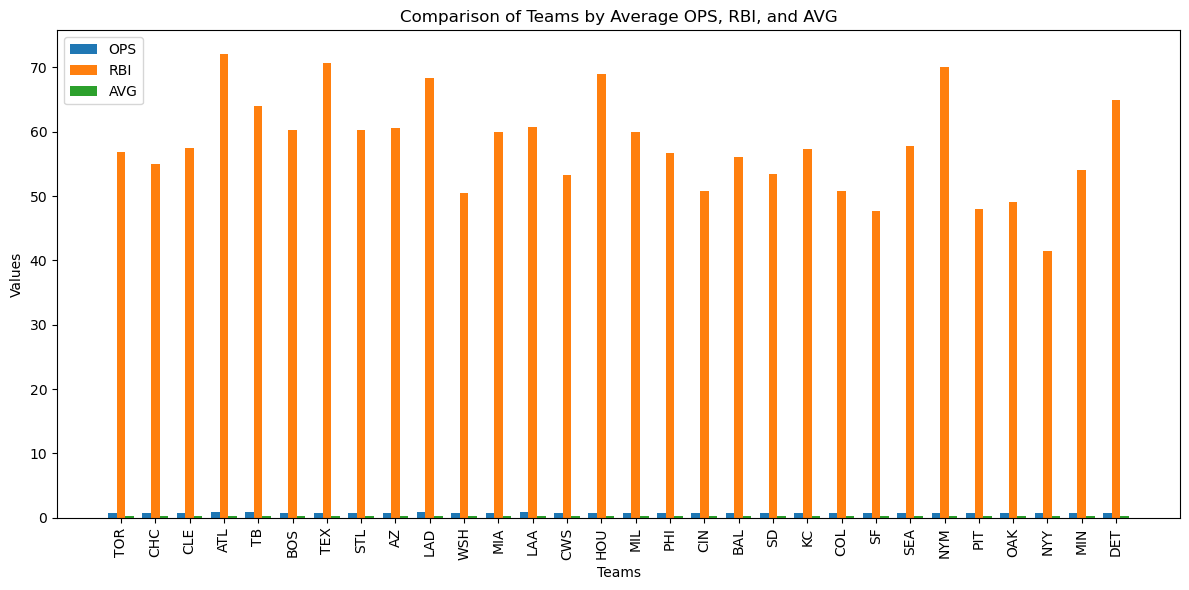

In [27]:
# Grouping the data by the "TEAM" column and calculating the mean for OPS, RBI, and AVG
team_stats = batter_df.groupby('TEAM')[['OPS', 'RBI', 'AVG']].mean().reset_index()

# Sorting by OPS for better visualization
team_stats = team_stats.sort_values(by='AVG', ascending=False)

# Plotting a bar chart for comparison
fig, ax = plt.subplots(figsize=(12, 6))

index = range(len(team_stats['TEAM']))
bar_width = 0.25

plt.bar(index, team_stats['OPS'], bar_width, label='OPS')
plt.bar([i + bar_width for i in index], team_stats['RBI'], bar_width, label='RBI')
plt.bar([i + bar_width * 2 for i in index], team_stats['AVG'], bar_width, label='AVG')

plt.xlabel('Teams')
plt.ylabel('Values')
plt.title('Comparison of Teams by Average OPS, RBI, and AVG')
plt.xticks([i + bar_width for i in index], team_stats['TEAM'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()
